In [ ]:
                                                              RANDOM FOREST

In [ ]:
#Random Forest is a supervised machine learning algorithm used for classification and regression tasks. 
It is an ensemble method that combines multiple Decision Trees to improve accuracy and reduce overfitting.

How Does Random Forest Work? 
Random Forest follows these key steps:

1. Bootstrap Sampling (Bagging) 
The algorithm creates multiple decision trees using random subsets of the training data.
Each subset is sampled using bootstrap aggregation (bagging), meaning some data points are used multiple times while others are left out.

2. Feature Randomness (Subspace Sampling) 
Each tree is trained on a random subset of features instead of using all features.
This reduces correlation between trees, making the model more robust.

3. Decision Tree Training 
Each tree is trained independently on its respective dataset.
A tree learns patterns and makes predictions based on the training data.

4. Majority Voting (For Classification)
Once all trees have made predictions, the Random Forest takes a majority vote from all trees.
The class with the most votes becomes the final predicted class.

5. Averaging (For Regression)
Instead of voting, for regression problems, the final prediction is the average of all decision trees' outputs.

steps performed
1: Load and Explore the Dataset
2: Handle Missing or Incorrect Values
3: Splitting Data into Training and Testing Sets
4: Train a Random Forest Model
5: Feature Importance Analysis
6: Random Forest Model Visualization

In [ ]:
Pima Indians Diabetes Dataset Overview:

This dataset contains 768 records with 9 columns. It is used for predicting diabetes based on medical attributes. Below are the details of each column:

time_pregnant_no - Number of times a patient has been pregnant.
    
plasma_concentration - Plasma glucose concentration (measured during an oral glucose tolerance test).
    
diastolic_blood_pressure - Diastolic blood pressure (mm Hg).
    
triceps_skinfold_thickness - Thickness of the triceps skinfold (mm).
    
serum_insulin - 2-Hour serum insulin (mu U/ml).
    
bmi - Body Mass Index (weight in kg/(height in m)^2).
    
diabetes_pedigree - Diabetes pedigree function (likelihood of diabetes based on family history).
    
age - Age of the individual.
    
class - Target variable (0 = No diabetes, 1 = Diabetes).
    

Our Goal:
    
We use Random Forest on the Pima Indians Diabetes dataset because it is a powerful ensemble learning algorithm that improves prediction accuracy and handles various data challenges effectively
Below are the key reasons why Random Forest is suitable for this dataset:

1. Handles Non-Linearity and Interactions:
The dataset contains multiple medical features that might have complex interactions. Random Forest, being a collection of decision trees, can effectively capture these relationships.
    
2. Reduces Overfitting:
Unlike a single Decision Tree, which tends to overfit the training data, Random Forest builds multiple trees and averages their predictions, reducing overfitting.
    
3. Works Well with Missing or Noisy Data
The dataset has some columns where zero values might represent missing data (e.g., serum insulin and triceps skinfold thickness). Random Forest can handle missing values better than other algorithms like Logistic Regression.
    
4. Feature Importance Analysis
Random Forest provides an importance score for each feature, helping us identify which medical attributes are most significant in predicting diabetes.
                                          
5. Handles Imbalanced Data Well
If the dataset is imbalanced (more non-diabetic cases than diabetic), Random Forest can handle this issue better by adjusting class weights or using bootstrapping.
                                          
6. Robust to Outliers
Decision Trees within Random Forest are less sensitive to outliers compared to linear models.
                                          
7. High Prediction Accuracy
Due to its ensemble nature, Random Forest often provides higher accuracy compared to individual models like Decision Trees or Logistic Regression.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\File\pima_indians_diabetes.csv")

In [7]:
df.head()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.tail()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time_pregnant_no            768 non-null    int64  
 1   plasma_concentration        768 non-null    int64  
 2   diastolic_blood_pressure    768 non-null    int64  
 3   triceps_skinfold_thickness  768 non-null    int64  
 4   serum_insulin               768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree           768 non-null    float64
 7   age                         768 non-null    int64  
 8   class                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.shape

(768, 9)

In [15]:
df.isnull().sum()

time_pregnant_no              0
plasma_concentration          0
diastolic_blood_pressure      0
triceps_skinfold_thickness    0
serum_insulin                 0
bmi                           0
diabetes_pedigree             0
age                           0
class                         0
dtype: int64

In [17]:
df.describe()

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# Columns where zero values are unlikely (could be missing data)
columns_to_fix = [
    "plasma_concentration", "diastolic_blood_pressure", 
    "triceps_skinfold_thickness", "serum_insulin", "bmi"
]

In [21]:
columns_to_fix

['plasma_concentration',
 'diastolic_blood_pressure',
 'triceps_skinfold_thickness',
 'serum_insulin',
 'bmi']

In [23]:
# Replace zeros with the median of each column

for col in columns_to_fix:    # Loop through each column in the list
    median_value = df[col].median()  # Find the median of the column (ignoring zeros)
    df[col] = df[col].replace(0, median_value)  # Replace all zero values in the column with the median

In [25]:
# Verify changes
df[columns_to_fix].describe()

,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,27.334635,94.652344,32.450911
std,30.438286,12.096642,9.229014,105.547598,6.875366
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,23.000000,30.500000,27.500000
50%,117.000000,72.000000,23.000000,31.250000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [27]:
from sklearn.model_selection import train_test_split

In [29]:

#Split Data into Features and Target

X = df.drop(columns=["class"])  # Features (all columns except the target)
y = df["class"]  # Target (diabetes: 1, no diabetes: 0)


In [31]:
X

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [35]:
# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# Check the shape of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:
#Train a Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [47]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [49]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.7597402597402597,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.85      0.82       100\n           1       0.68      0.59      0.63        54\n\n    accuracy                           0.76       154\n   macro avg       0.74      0.72      0.73       154\nweighted avg       0.75      0.76      0.76       154\n')

In [ ]:
Accuracy Score:

0.7597.This means our Random Forest model achieved 75.97% accuracy on the test dataset.
It means about 76% of the predictions were correct.


Classification Report:

a)  Precision (Positive Predictive Value)
Class 0 (No Diabetes): 0.79 (79%)
Out of all predicted "No Diabetes" cases, 79% were correct.
    
Class 1 (Diabetes): 0.68 (68%)
Out of all predicted "Diabetes" cases, 68% were correct.

b)  Recall (Sensitivity, True Positive Rate)
Class 0 (No Diabetes): 0.85 (85%)
Out of all actual No Diabetes cases, 85% were correctly identified.
    
Class 1 (Diabetes): 0.59 (59%)
Out of all actual Diabetes cases, only 59% were correctly identified.

c)F1-Score (Harmonic Mean of Precision & Recall)
Class 0 (No Diabetes): 0.82
Class 1 (Diabetes): 0.63
Higher F1-score = Better balance between precision & recall.

d) Support (Sample Count)
 Support (Sample Count)
Class 0 (No Diabetes): 100 samples
Class 1 (Diabetes): 54 samples
Support simply tells us how many instances of each class were in the test set.

Conclusion:    
The model is performing well overall (76% accuracy).
It predicts "No Diabetes" cases (Class 0) better than "Diabetes" cases (Class 1).
Recall for Diabetes (59%) is lower, meaning the model is missing some actual diabetic cases.

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Feature Importance Analysis

feature_importance = rf_model.feature_importances_
# an attribute of a trained Random Forest model (rf_model).
# feature_importances is a NumPy array that contains the importance score for each feature in the dataset.
features = X.columns   
#retrieves the column names from the feature matrix X (i.e., input variables used for training).

In [71]:
# Create a DataFrame for visualization

importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
#The pd.DataFrame() function creates a DataFrame with two columns:
#Feature" → Names of the features.
#Importance" → Corresponding importance scores.

importance_df = importance_df.sort_values(by="Importance", ascending=False)
#The sort_values() function sorts the DataFrame based on the "Importance" column.

In [73]:
importance_df

,Feature,Importance
1,plasma_concentration,0.277013
5,bmi,0.163056
6,diabetes_pedigree,0.123334
7,age,0.119859
2,diastolic_blood_pressure,0.087446
0,time_pregnant_no,0.082304
4,serum_insulin,0.074398
3,triceps_skinfold_thickness,0.072591


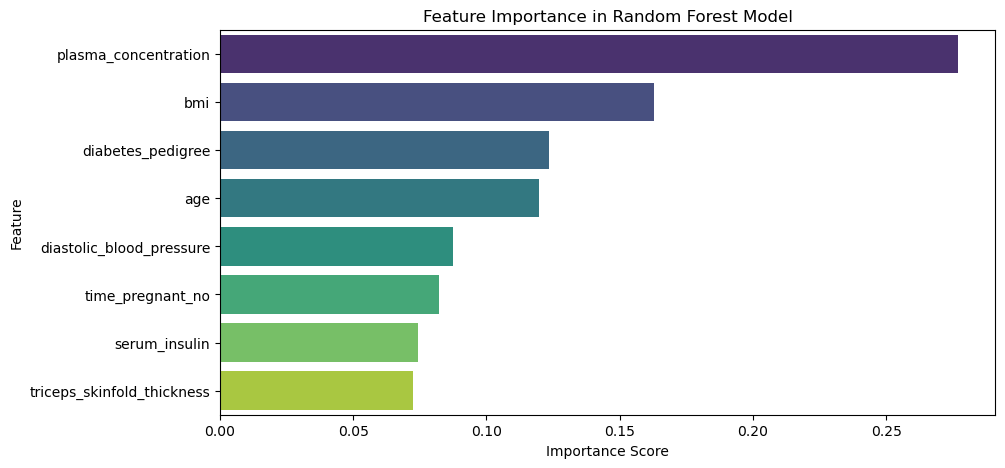

,Feature,Importance
1,plasma_concentration,0.277013
5,bmi,0.163056
6,diabetes_pedigree,0.123334
7,age,0.119859
2,diastolic_blood_pressure,0.087446
0,time_pregnant_no,0.082304
4,serum_insulin,0.074398
3,triceps_skinfold_thickness,0.072591


In [59]:
# Plot the feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

importance_df

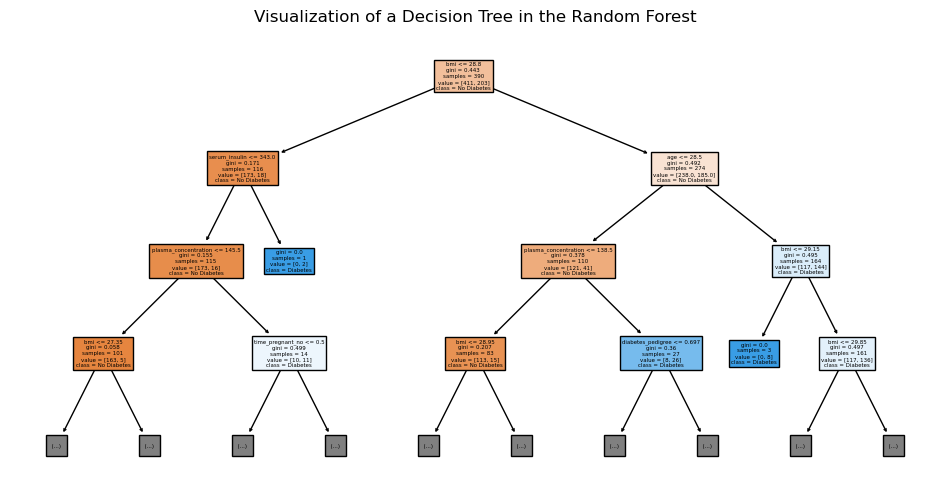

In [67]:
from sklearn.tree import plot_tree

#Visualizing a Single Decision Tree from the Random Forest
plt.figure(figsize=(12, 6))

# Plot one of the trees in the Random Forest (e.g., the first tree)
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True, max_depth=3)

plt.title("Visualization of a Decision Tree in the Random Forest")
plt.show()
